# Purpose of tis Notebook

This notebook can be used to produce initial visualisations of the extracted streams. It inputs pcaps and produced scatter plots. Time is represented continuously, not in discrete values. The of this note book is for initial data inspection only.

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scapy.all import IP, TCP, rdpcap
import re

In [2]:
ip_regex = re.compile(r"\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}")

In [3]:
file_string = "aim_chat_3a-59.41.39.125-131.202.240.87-63081-22.pcap"

re.findall(ip_regex, file_string)[0]

'59.41.39.125'

In [76]:
def draw_flows(path: str, max = False):

    file_list = sorted(os.listdir(path), key = lambda x: os.path.getsize(path + "/" + x), reverse=True)


    for counter, file in enumerate(file_list):

        packets = rdpcap(f"{path}/{file}")
        start_time = packets[0].time

        packets_array = np.zeros((len(packets), 4))

        ip = re.findall(ip_regex, file)[0]

        for i in range(len(packets)):
            direction = (lambda i: 0 if packets[i][IP].src == ip else 1)
            packets_array[i] = [i, packets[i].time -  start_time, packets[i][IP].len, direction(i)]
        

        plt.figure(figsize=(10, 3))
  
        plt.scatter(packets_array[:,1], packets_array[:,2], c=packets_array[:,3], alpha=0.3)
        plt.title(file[:-5].replace('-', ' - '))
            
        plt.show()

        if max and counter >= max -1:
            break



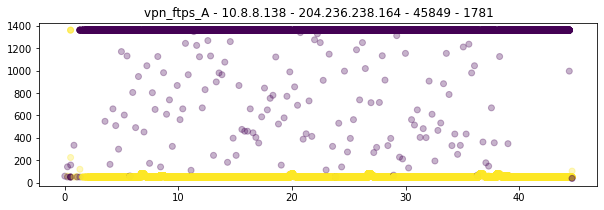

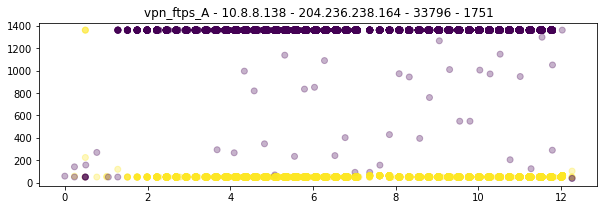

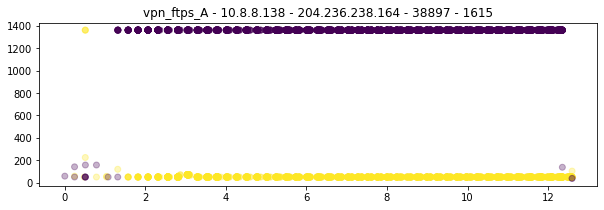

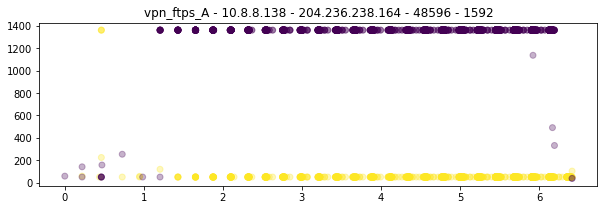

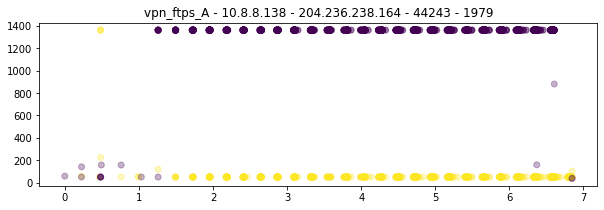

In [79]:
draw_flows("SCX-VPN-NonVPN-2016/VPN-PCAPS-01/extracted/vpn_ftps_A", max=5)

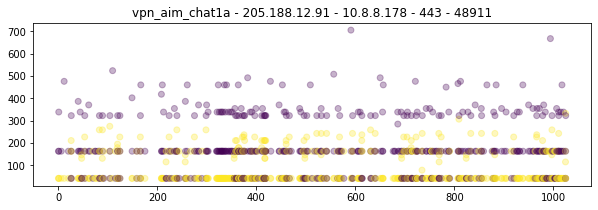

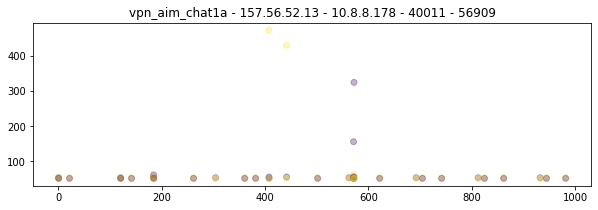

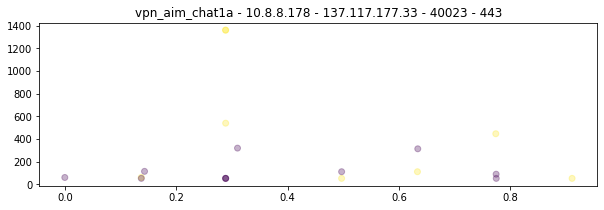

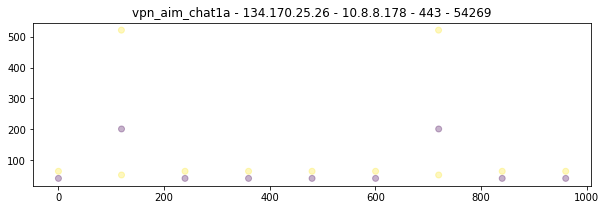

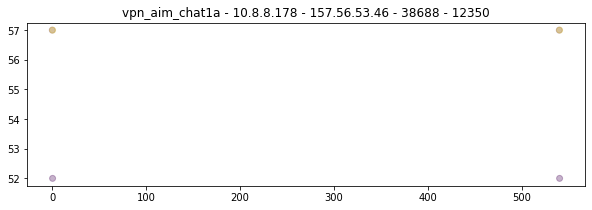

In [78]:
draw_flows("SCX-VPN-NonVPN-2016/VPN-PCAPS-01/extracted/vpn_aim_chat1a", max=5)

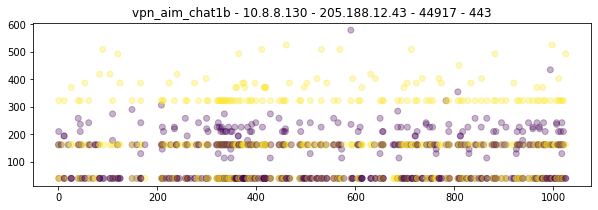

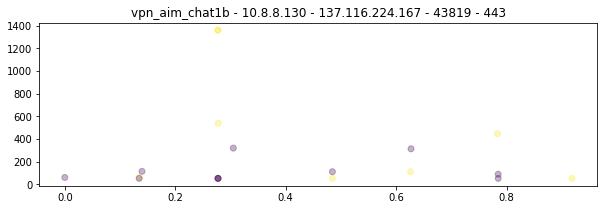

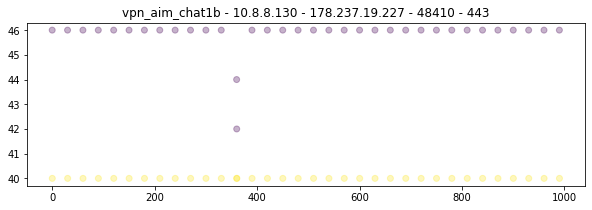

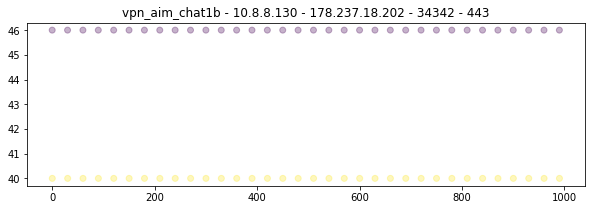

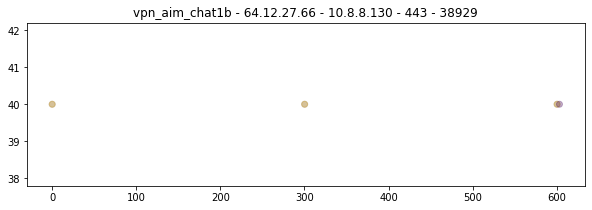

In [80]:
draw_flows("SCX-VPN-NonVPN-2016/VPN-PCAPS-01/extracted/vpn_aim_chat1b", max=5)

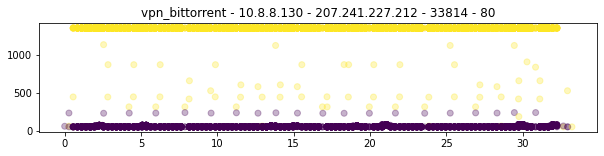

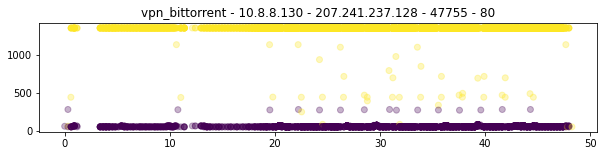

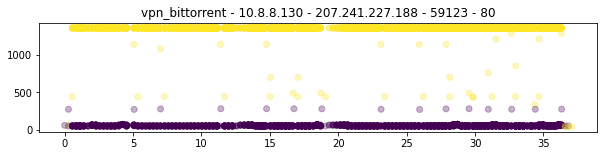

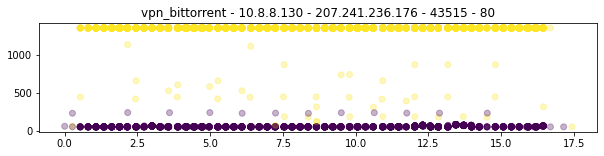

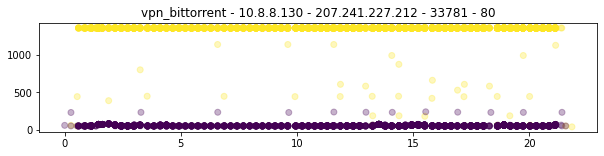

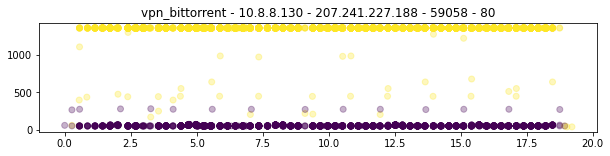

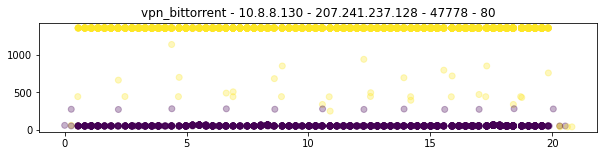

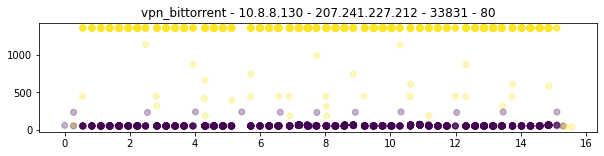

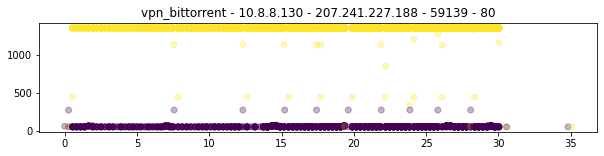

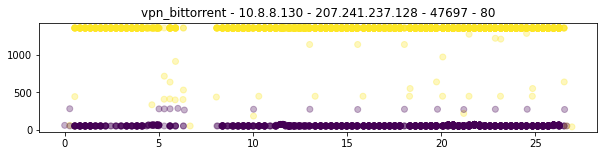

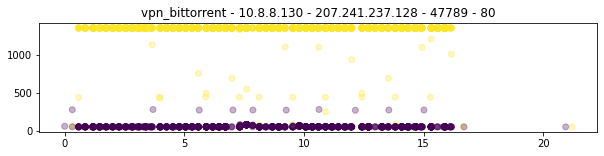

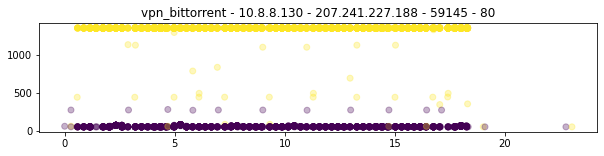

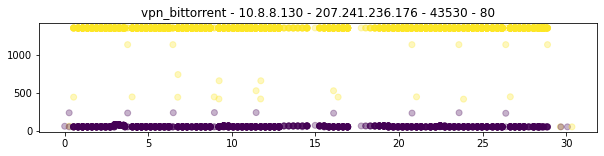

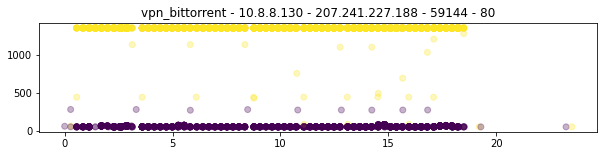

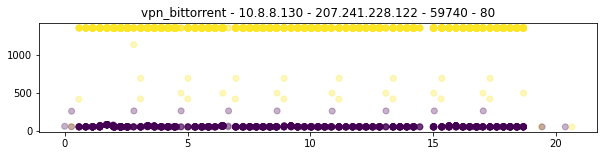

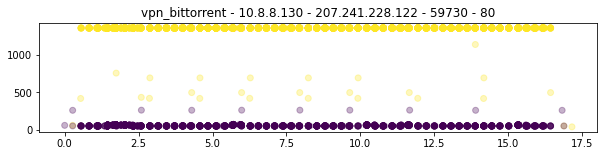

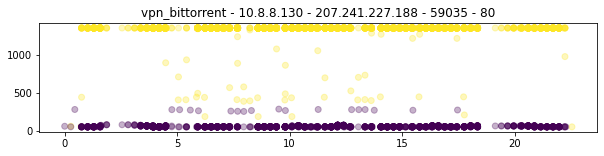

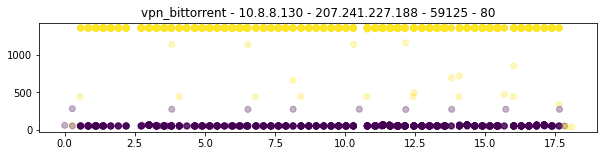

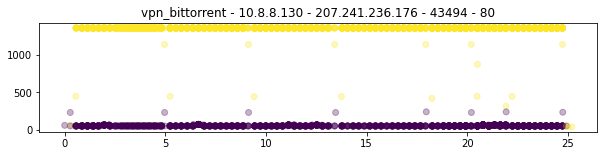

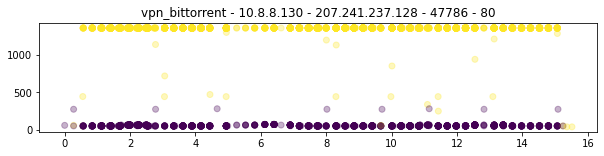

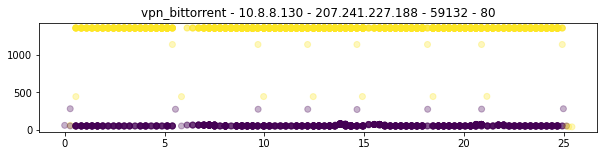

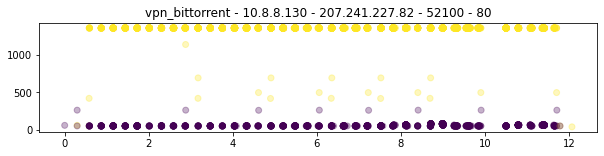

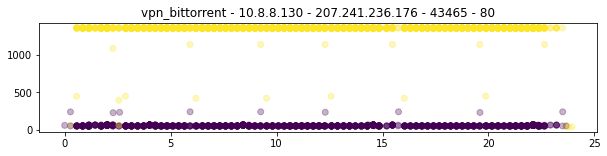

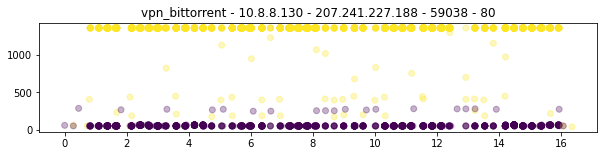

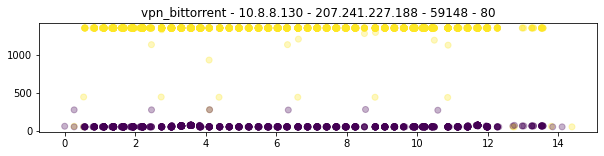

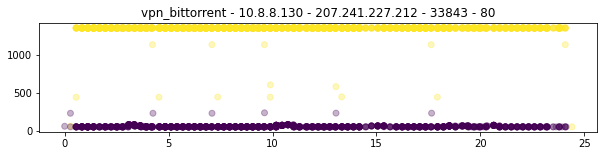

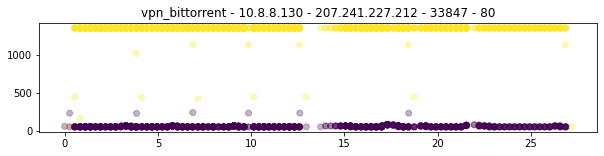

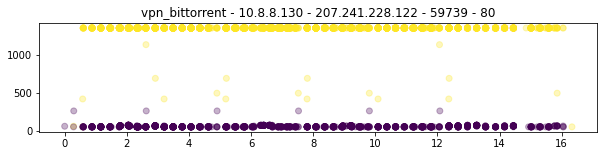

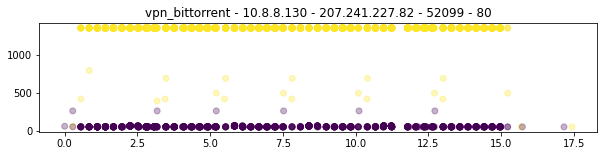

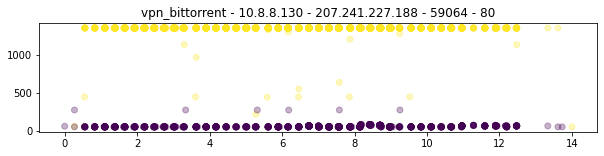

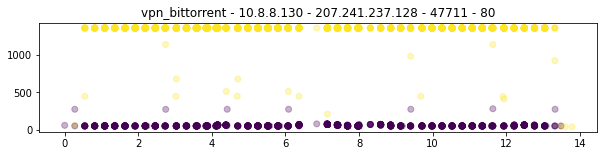

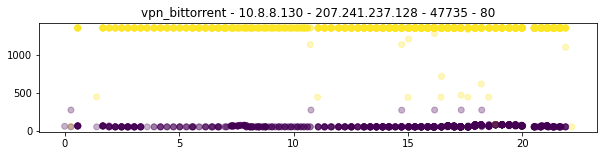

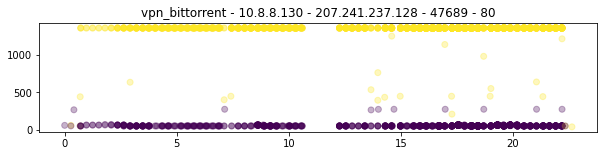

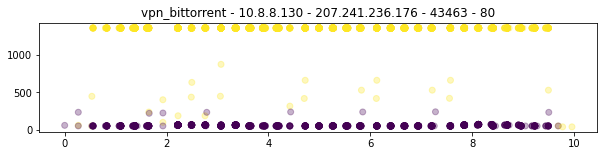

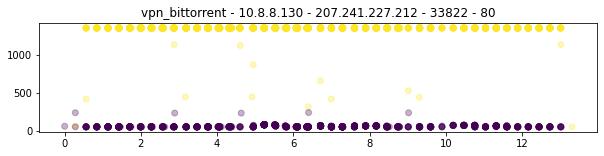

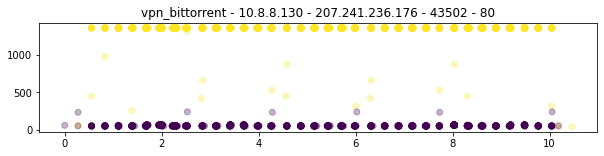

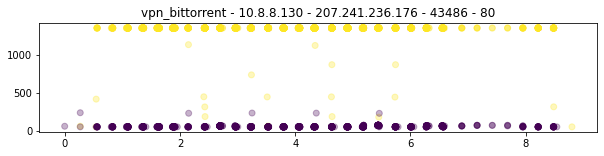

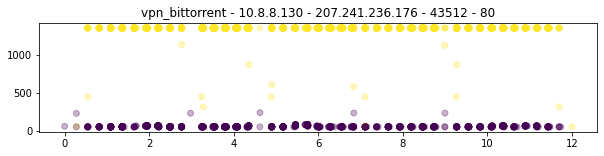

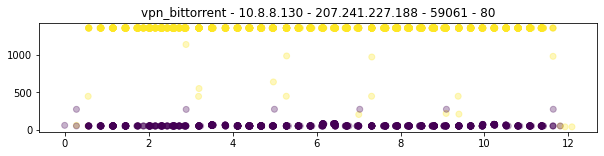

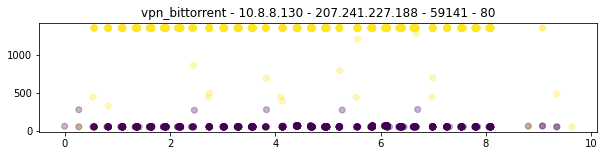

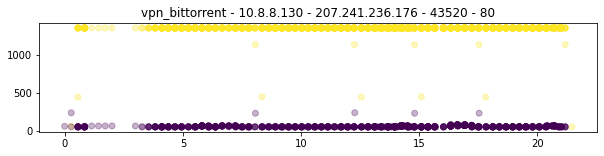

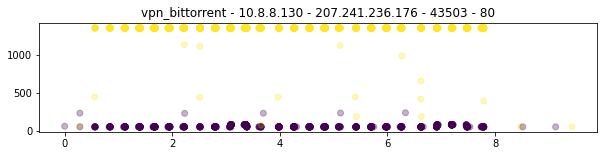

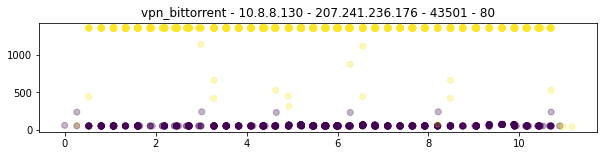

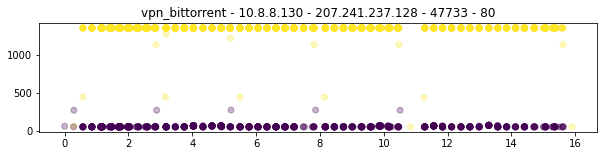

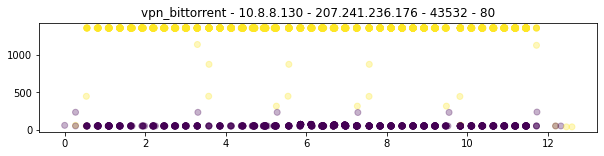

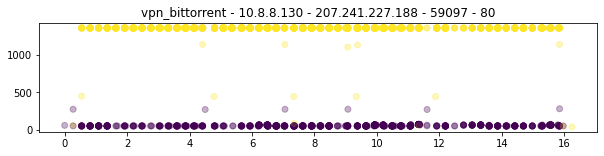

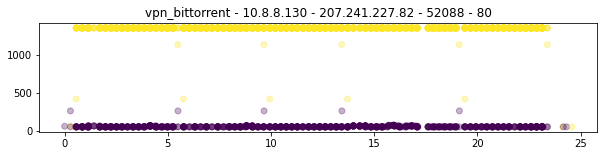

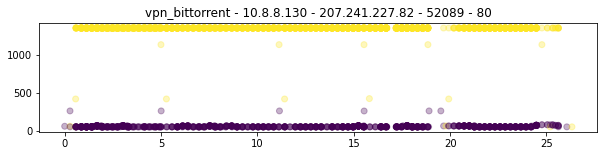

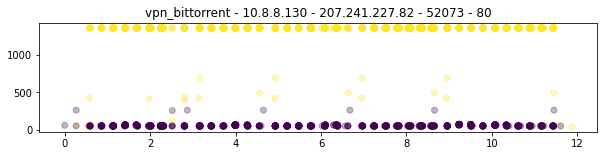

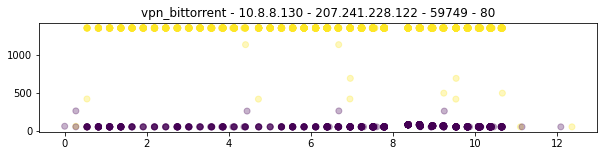

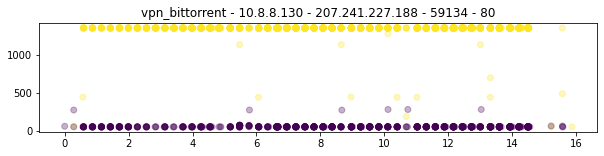

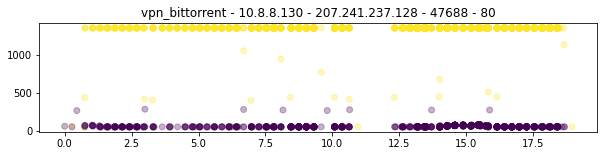

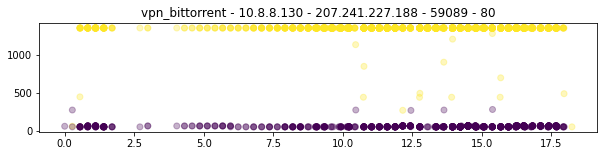

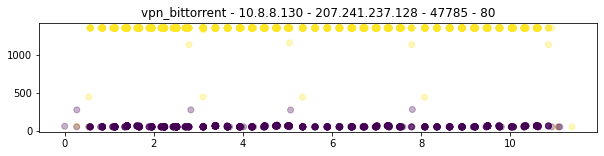

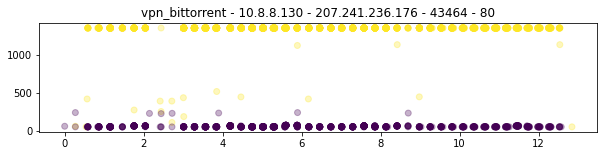

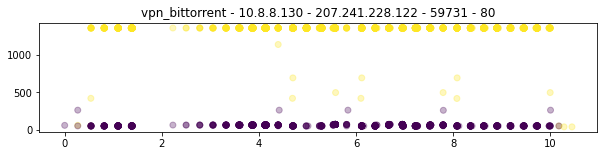

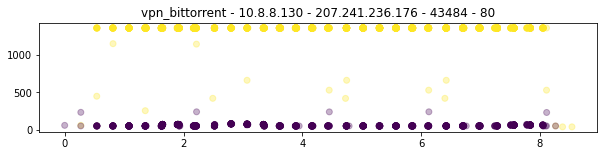

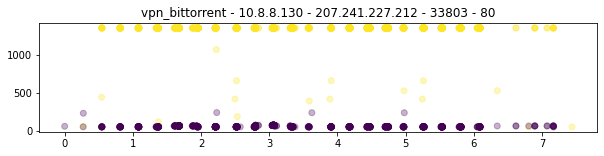

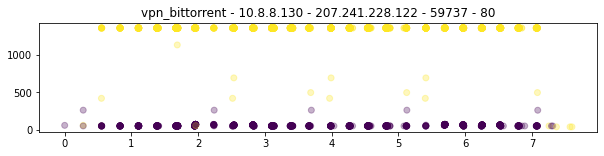

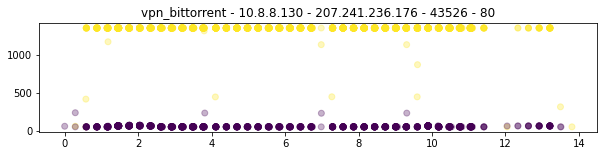

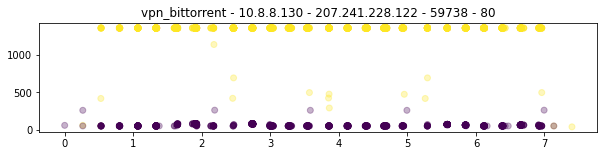

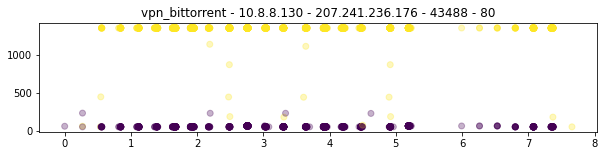

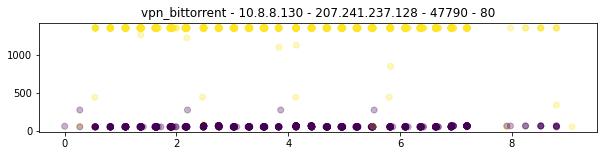

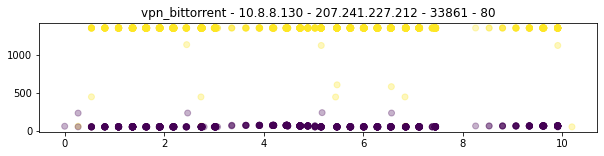

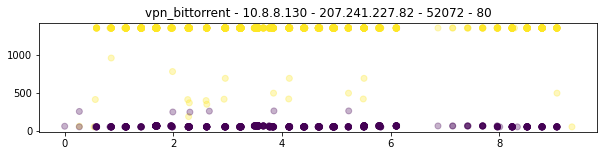

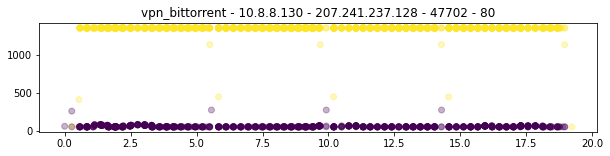

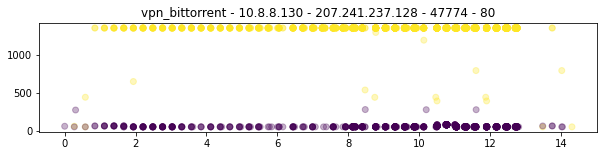

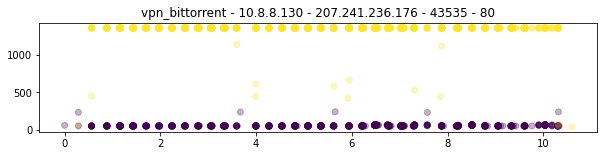

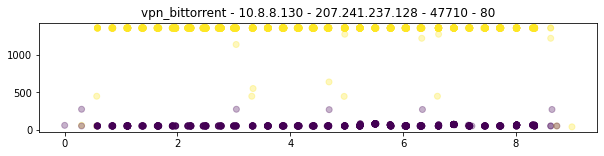

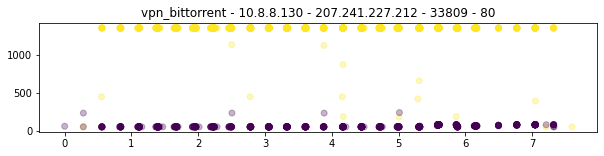

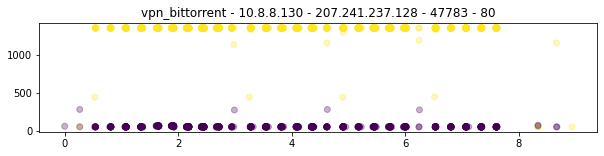

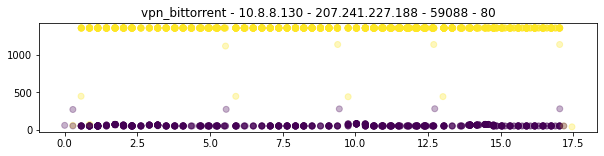

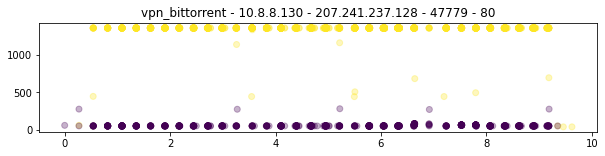

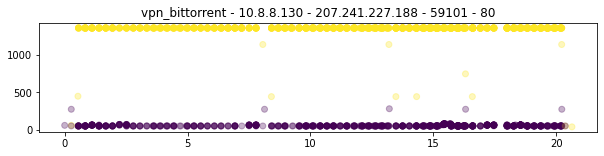

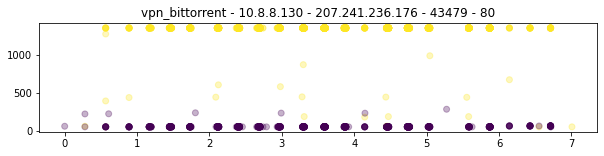

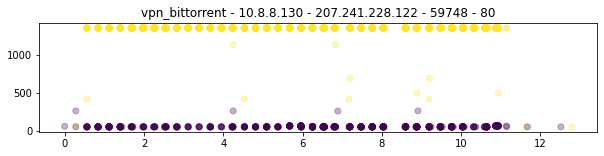

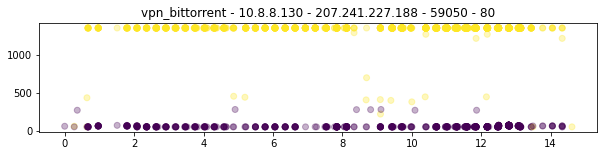

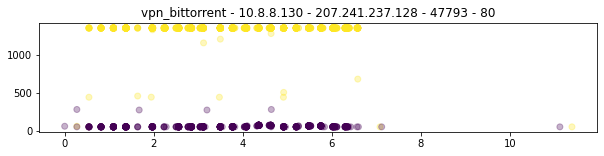

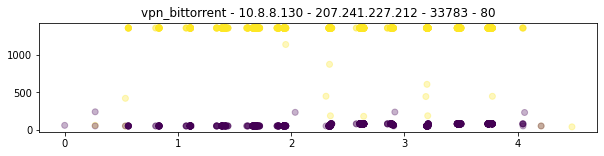

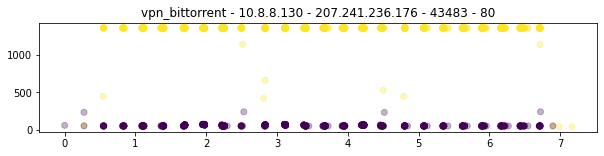

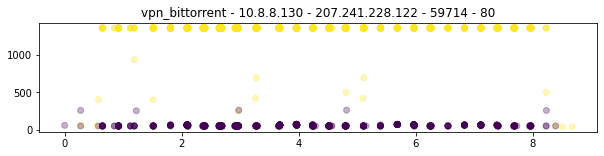

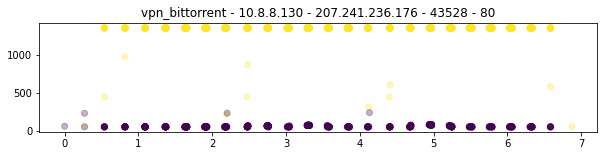

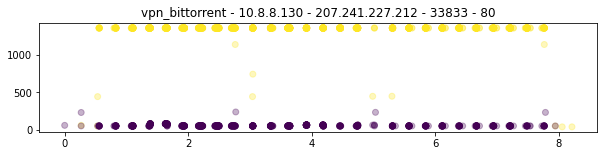

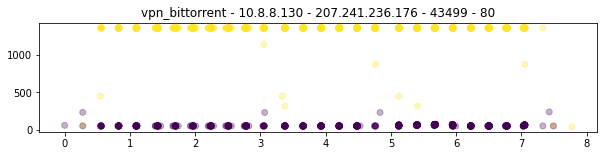

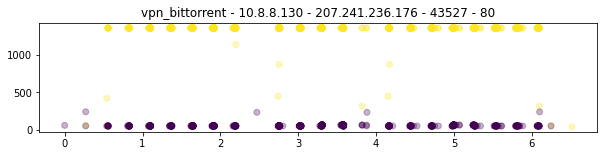

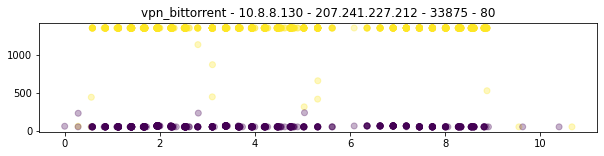

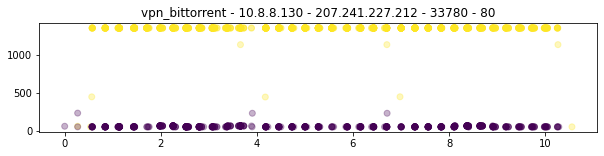

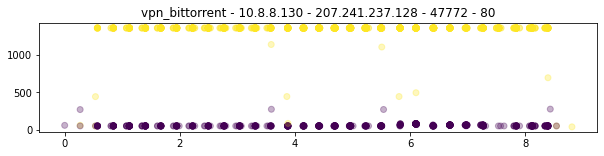

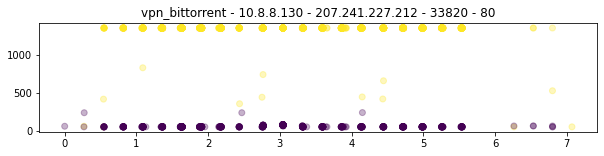

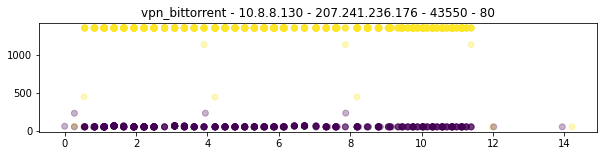

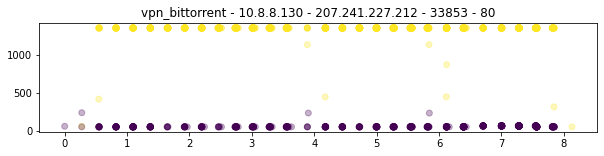

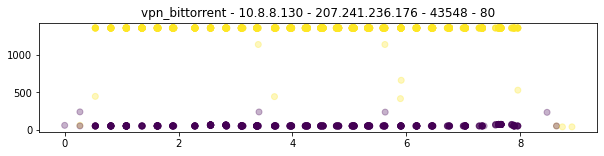

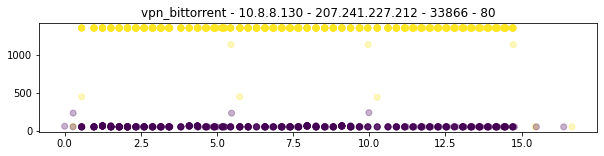

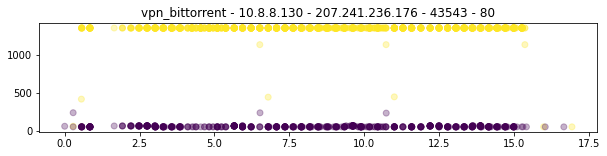

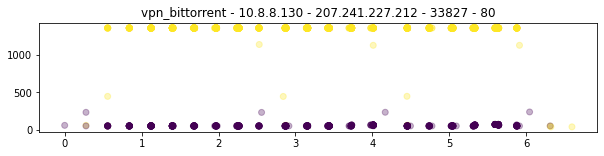

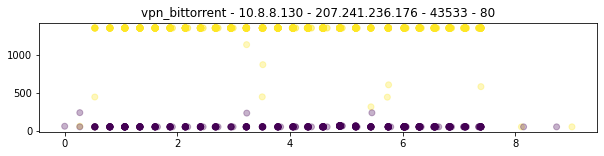

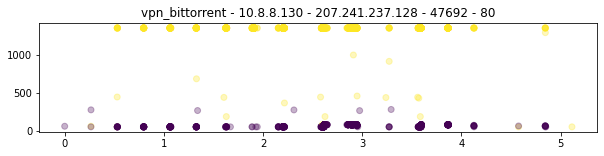

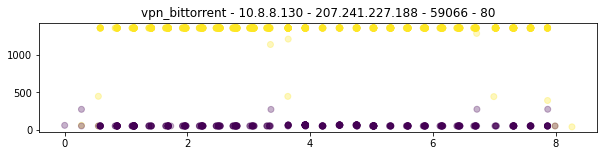

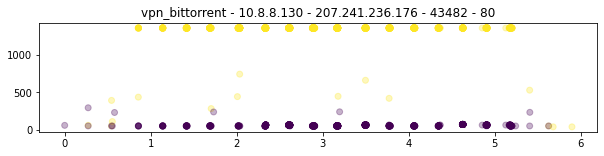

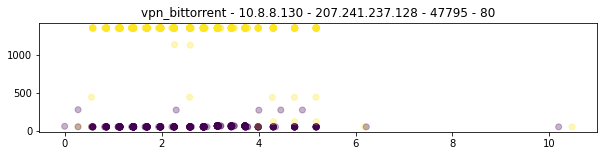

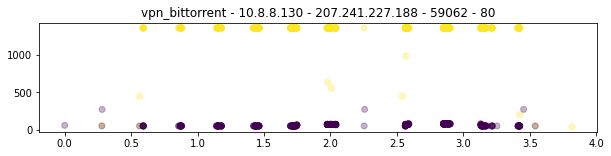

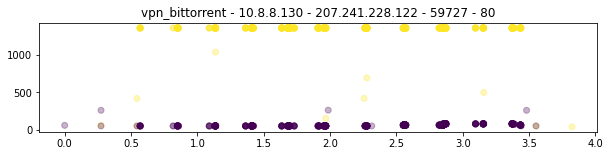

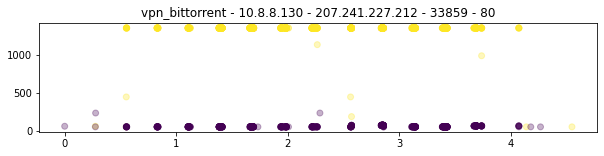

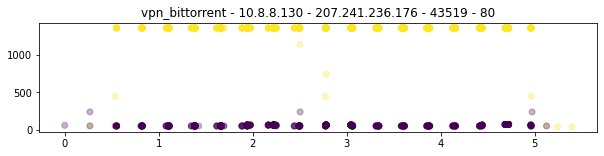

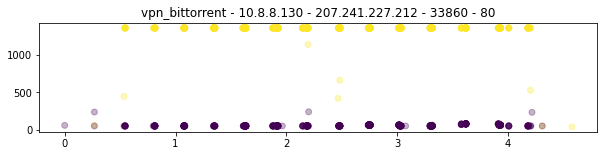

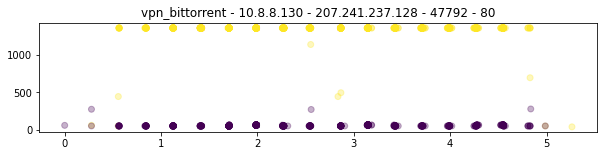

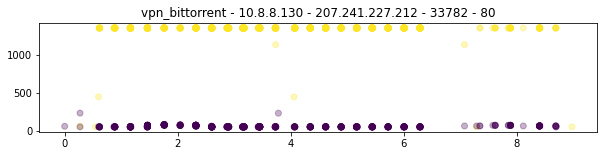

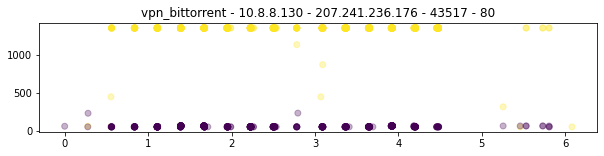

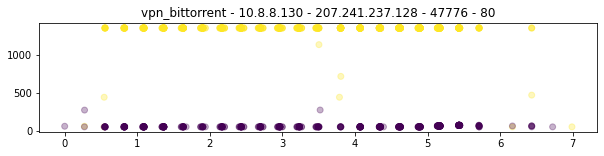

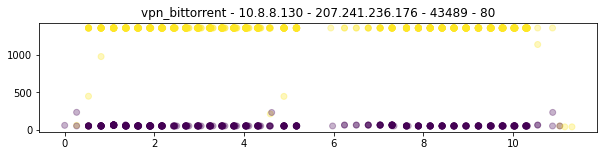

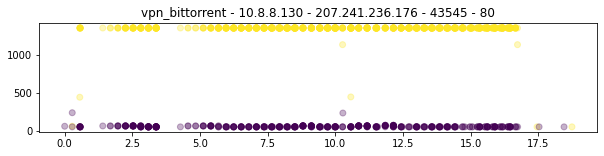

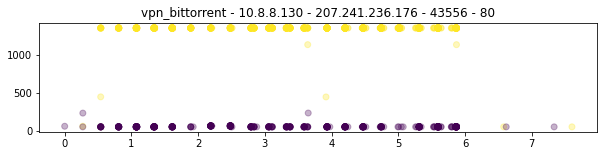

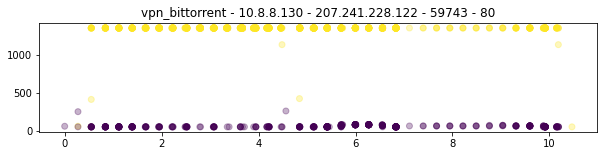

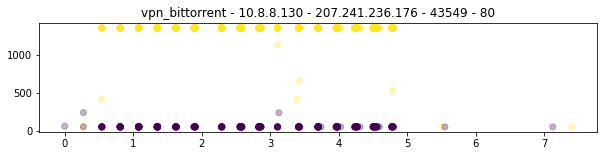

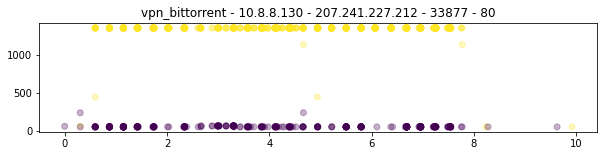

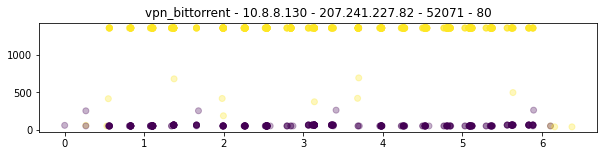

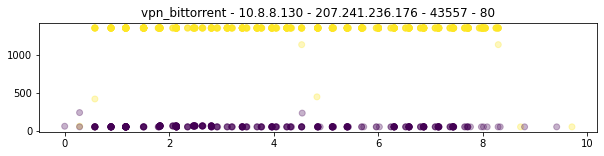

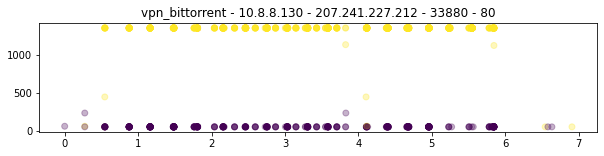

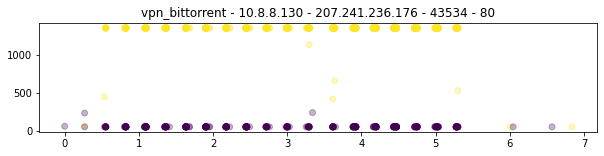

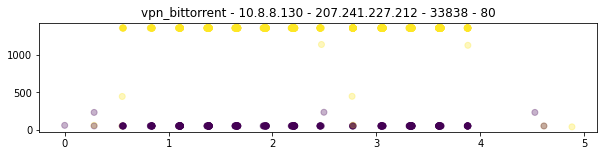

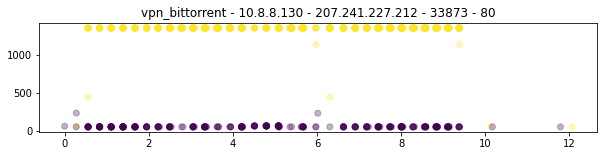

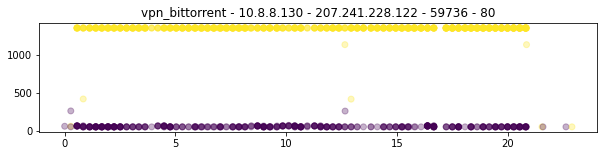

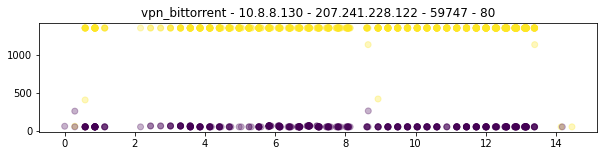

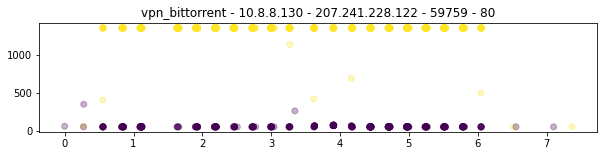

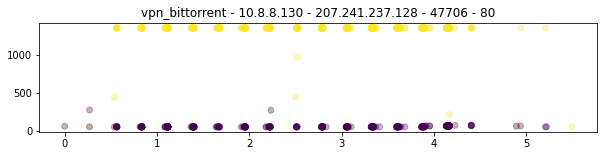

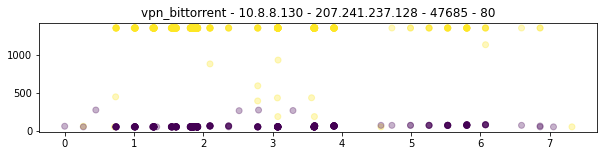

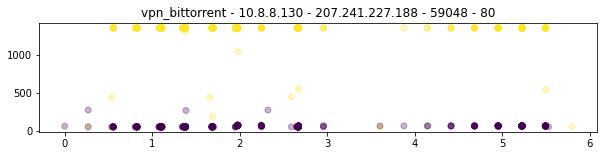

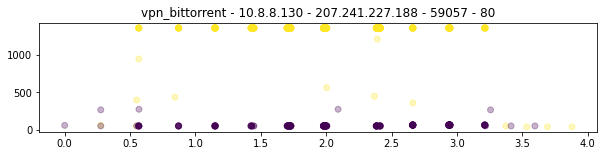

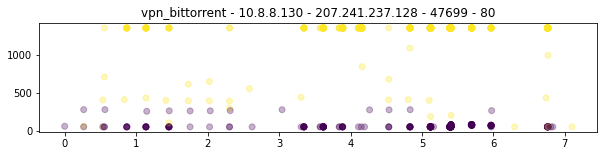

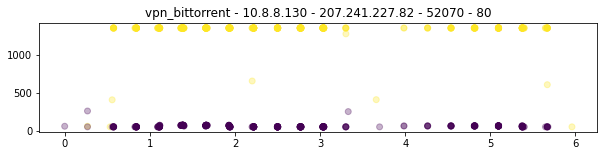

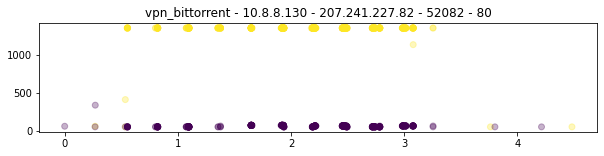

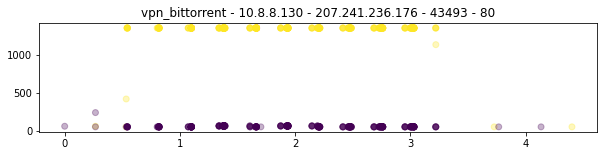

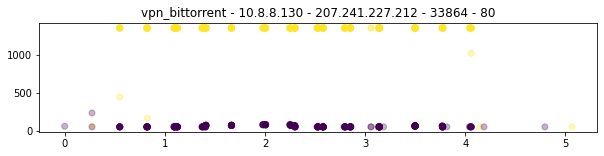

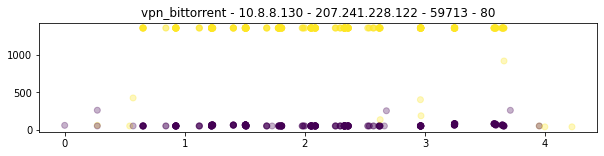

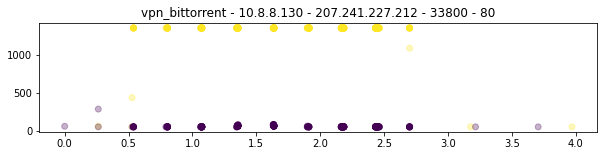

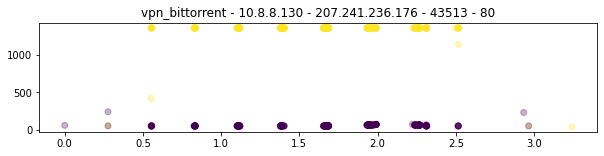

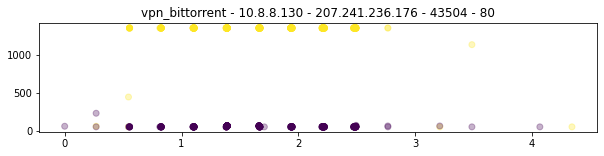

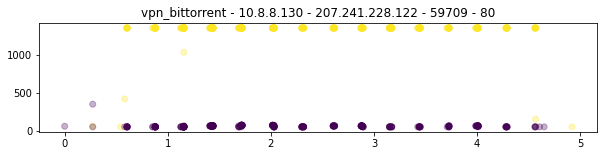

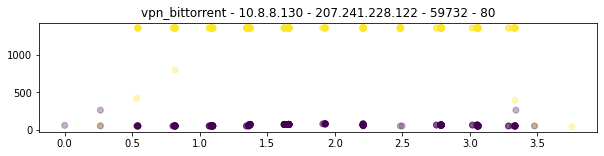

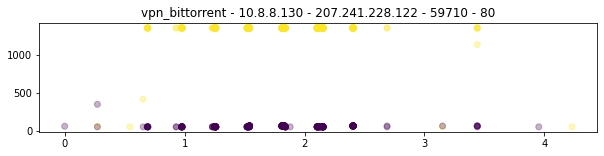

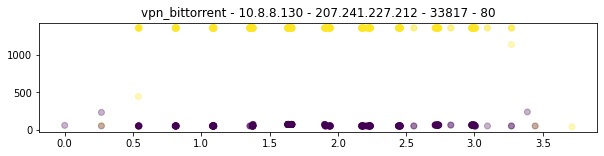

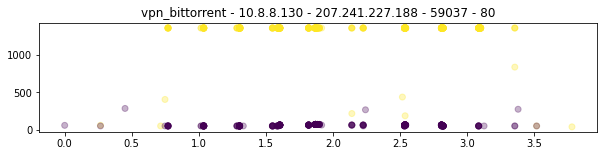

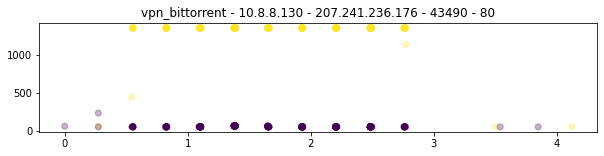

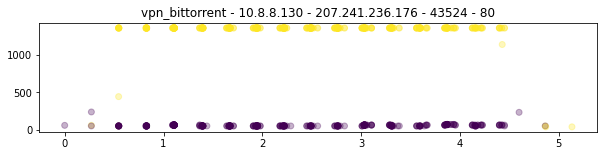

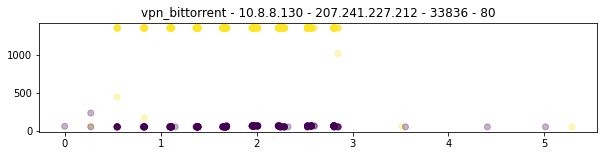

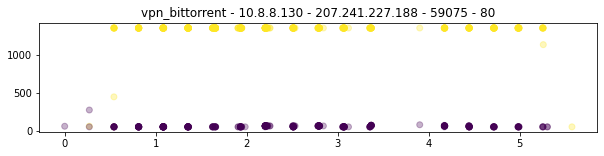

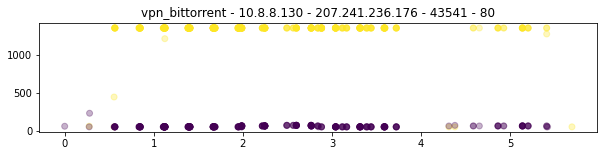

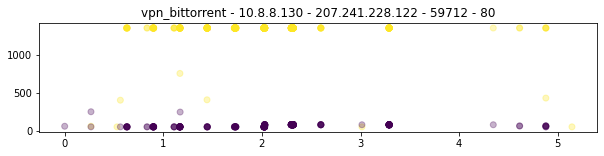

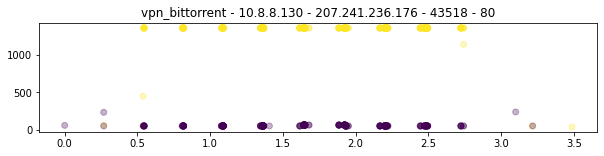

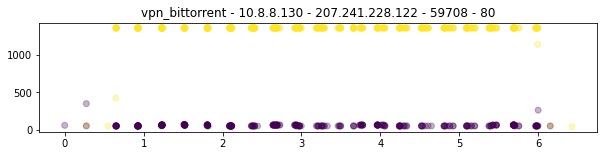

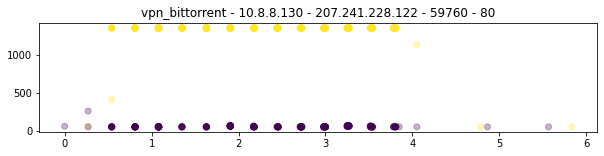

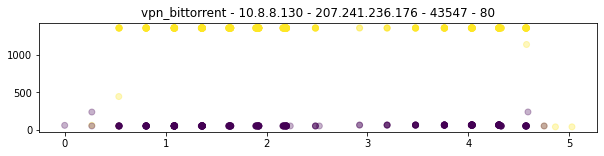

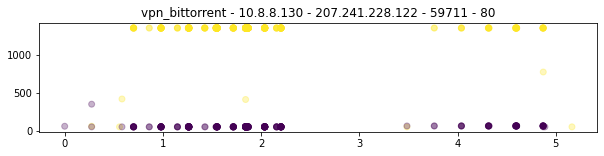

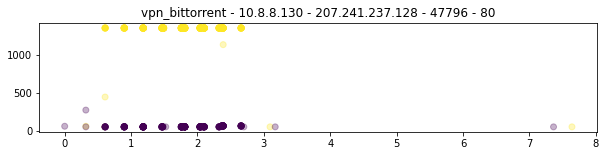

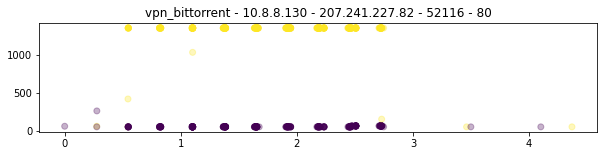

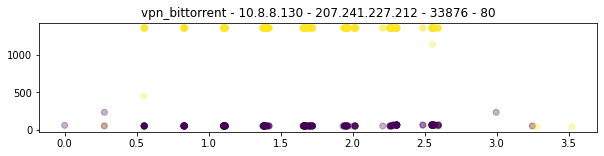

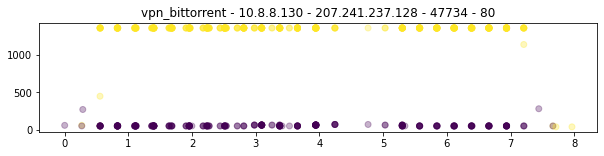

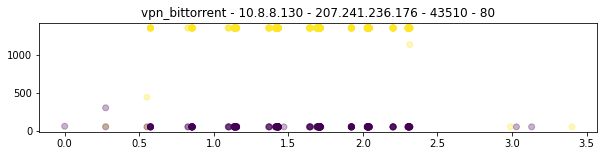

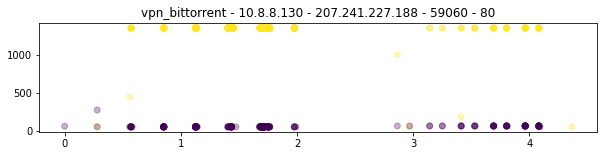

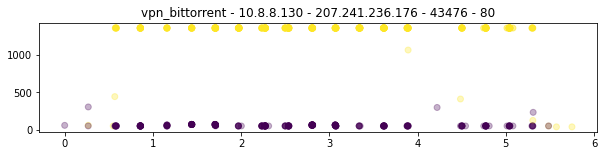

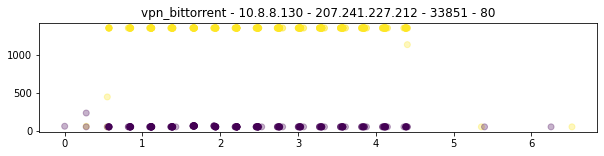

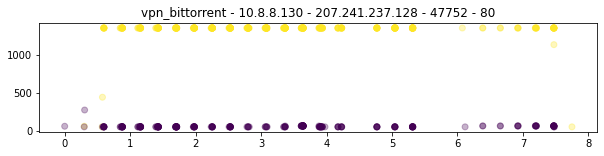

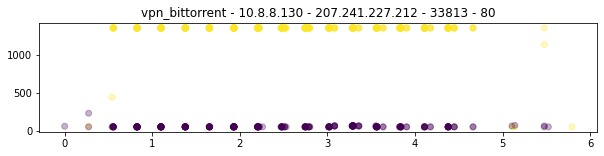

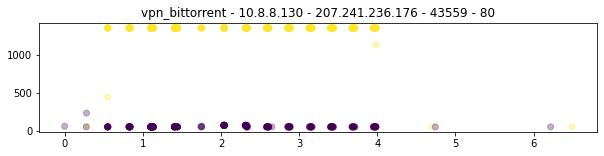

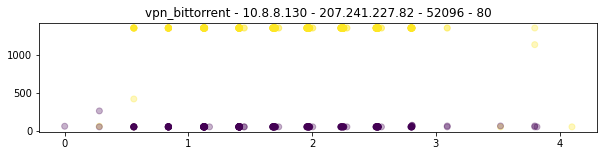

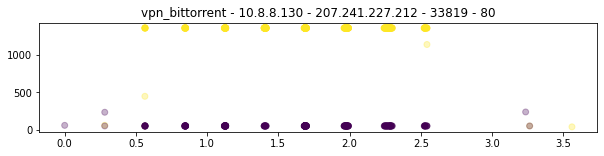

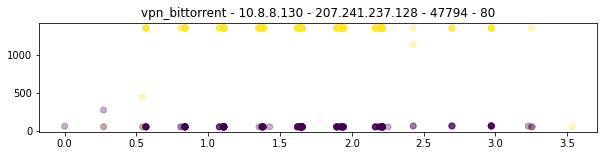

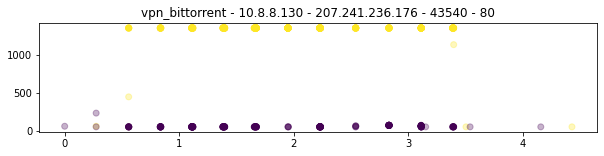

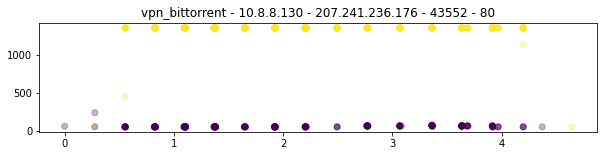

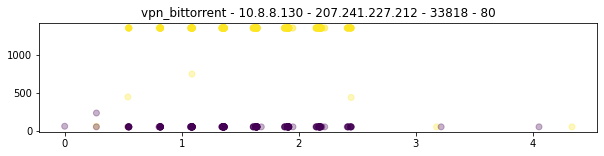

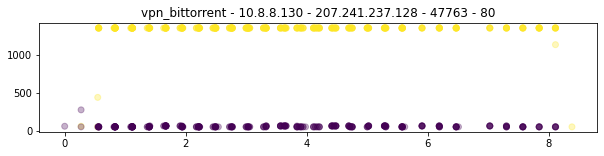

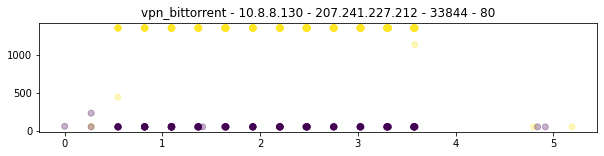

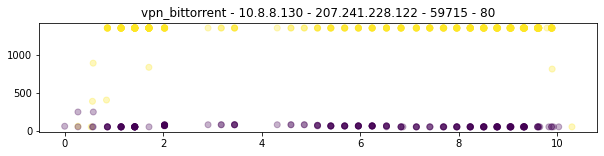

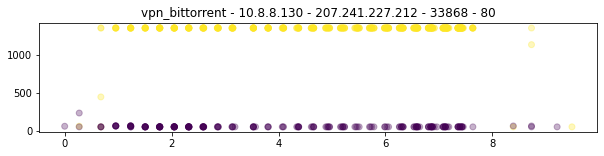

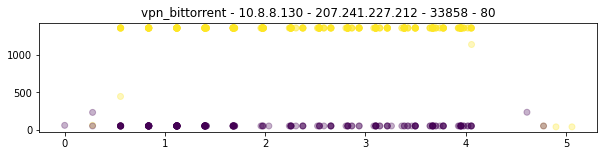

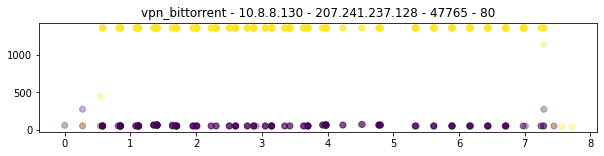

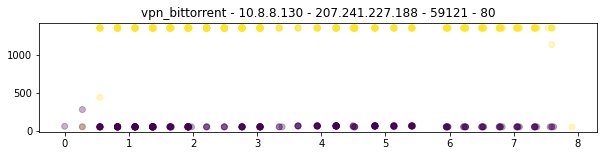

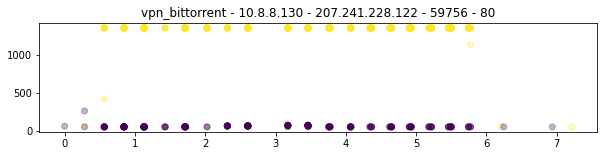

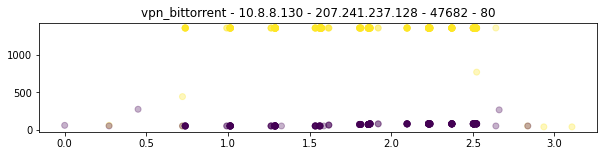

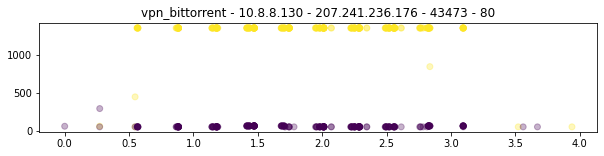

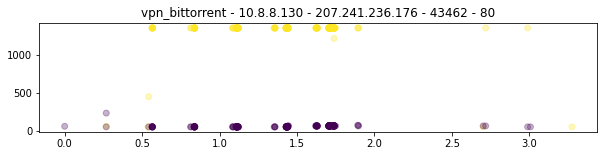

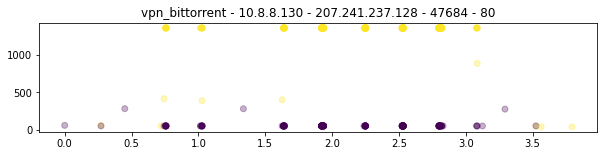

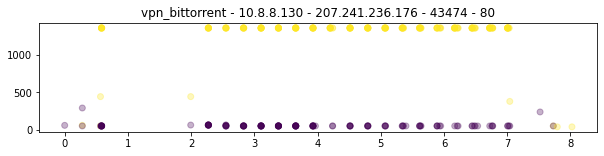

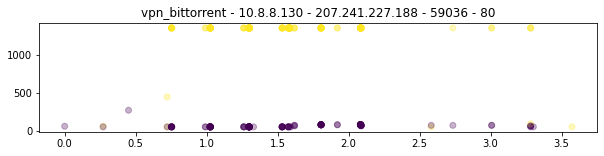

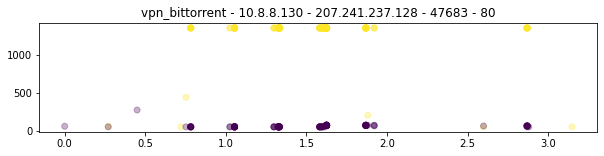

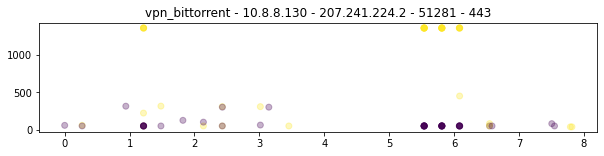

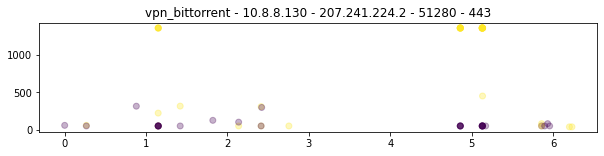

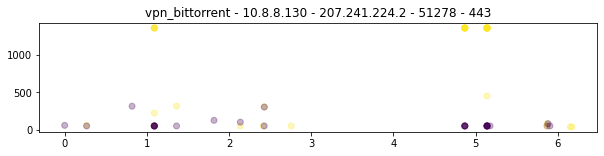

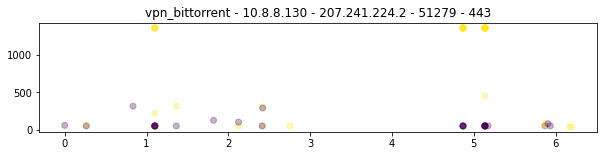

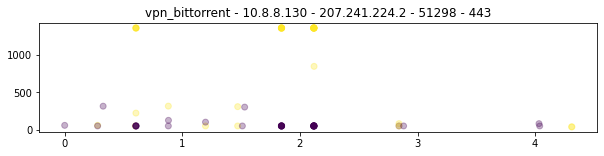

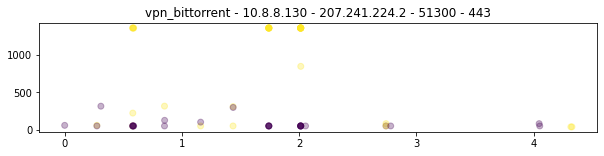

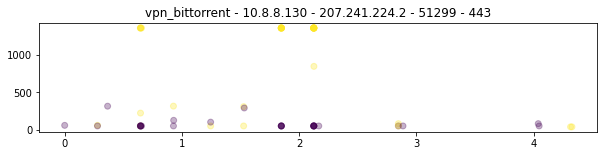

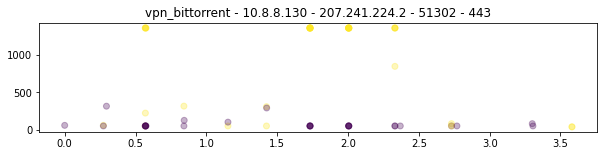

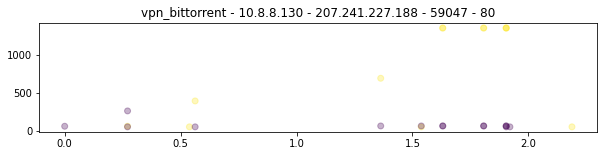

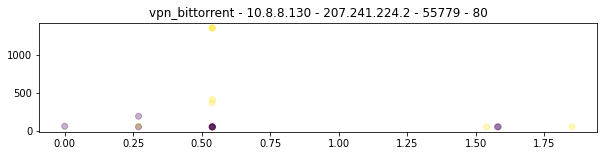

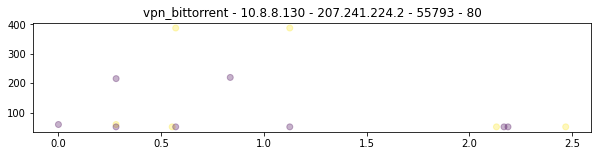

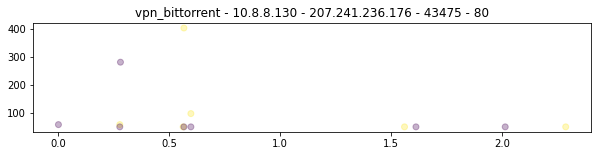

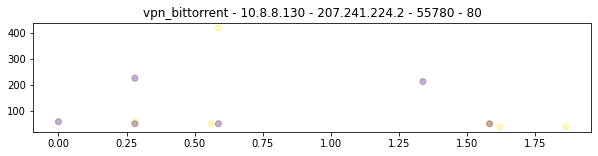

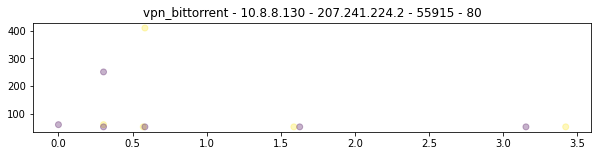

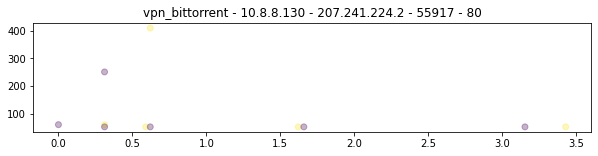

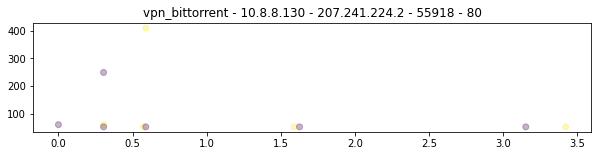

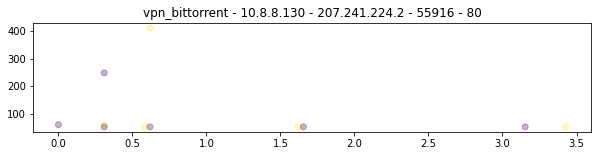

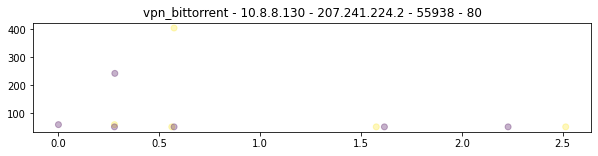

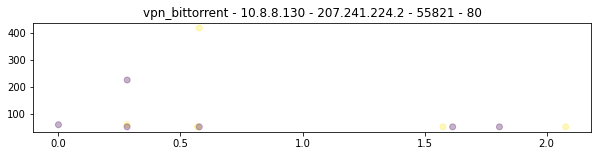

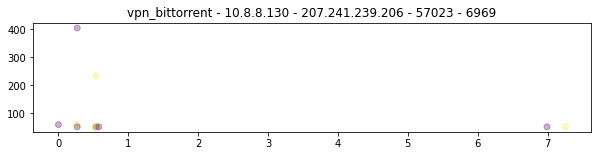

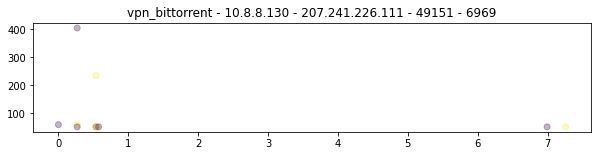

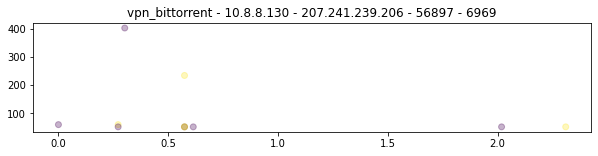

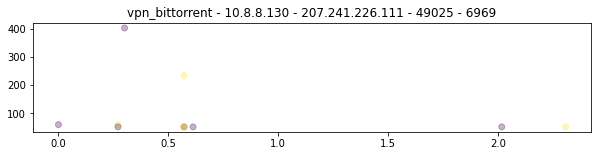

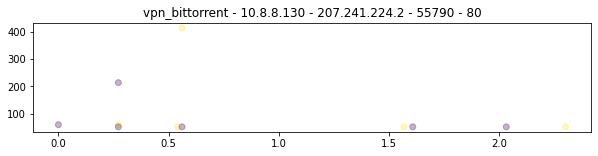

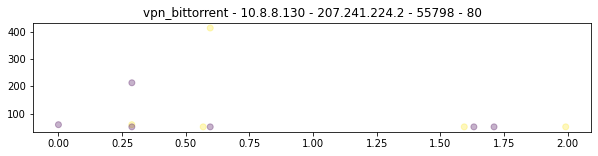

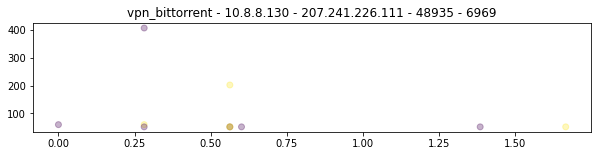

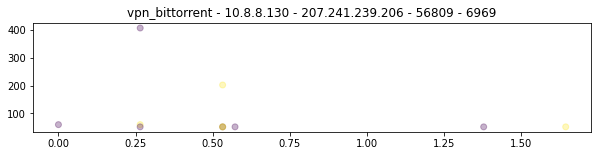

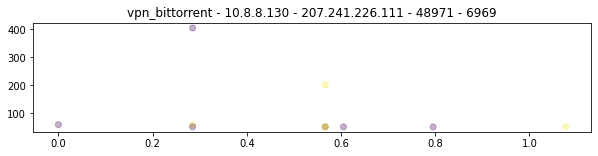

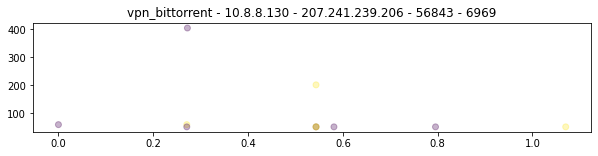

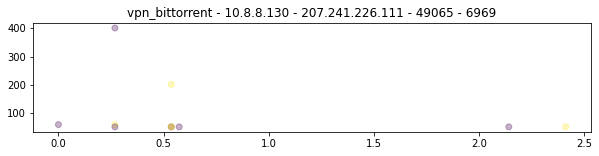

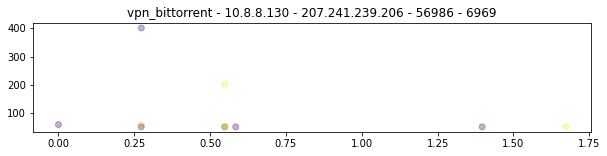

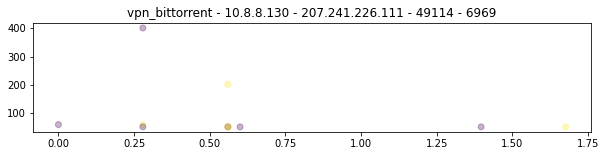

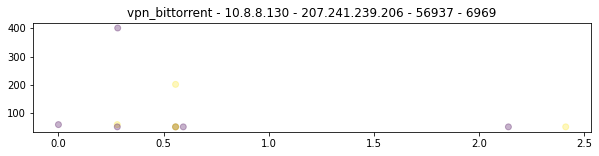

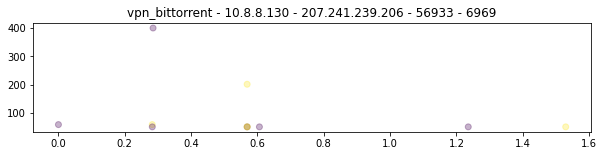

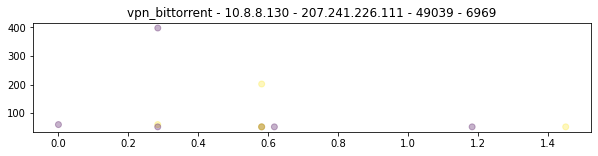

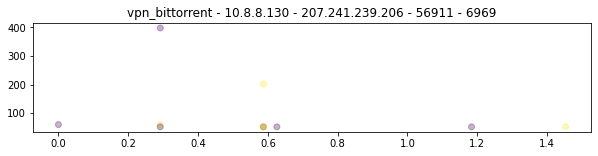

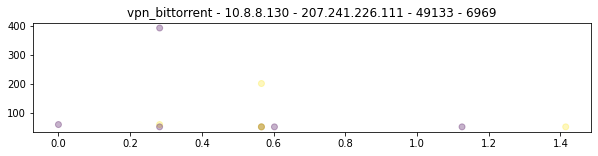

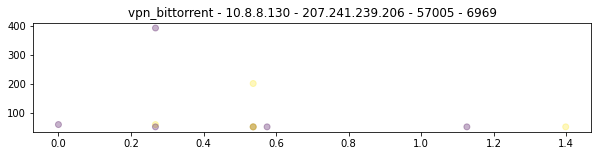

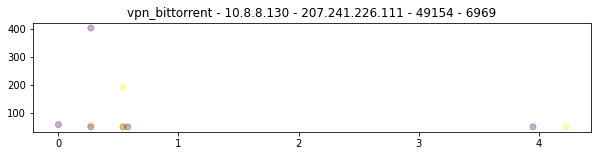

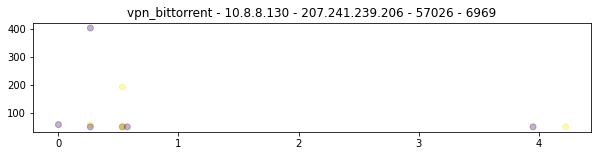

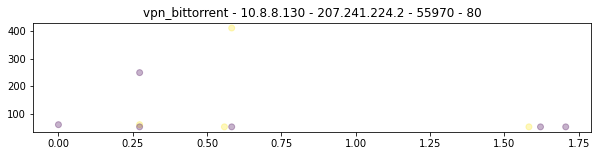

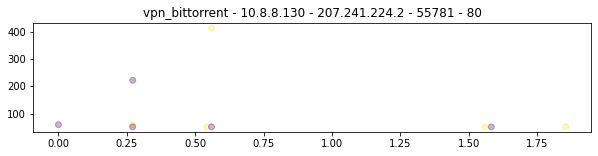

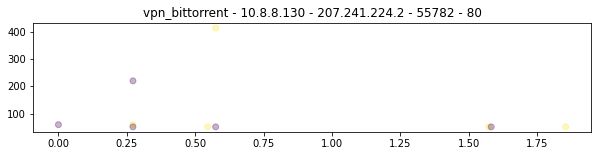

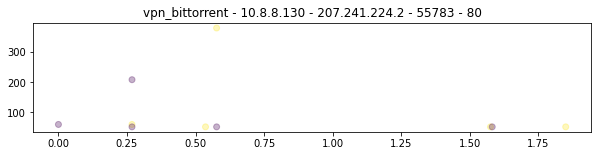

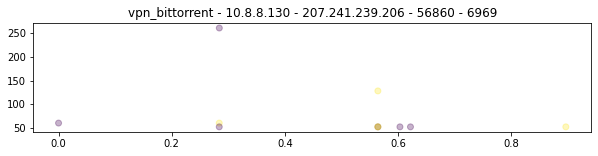

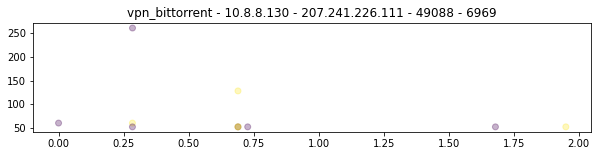

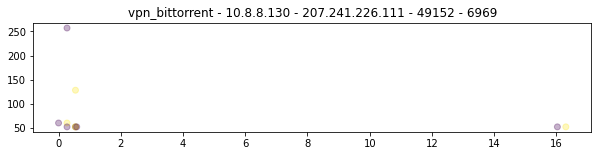

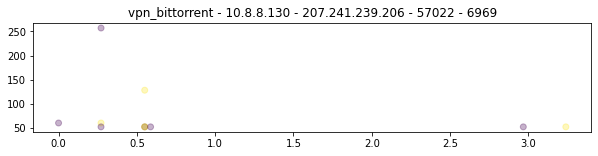

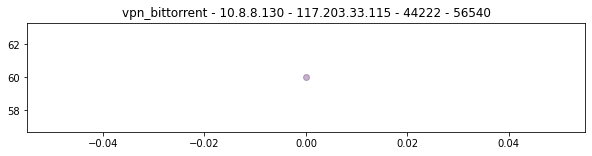

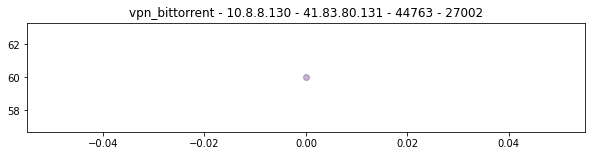

In [8]:
draw_flows("SCX-VPN-NonVPN-2016/VPN-PCAPS-01/extracted/vpn_bittorrent")

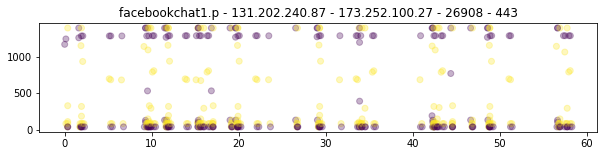

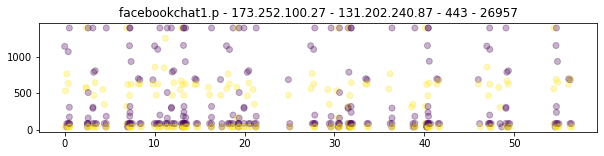

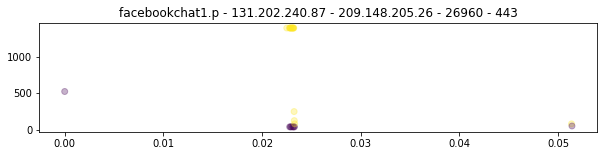

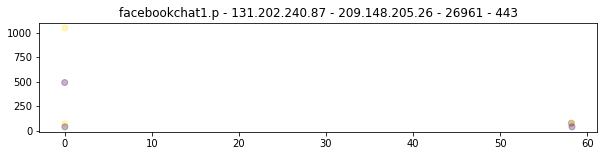

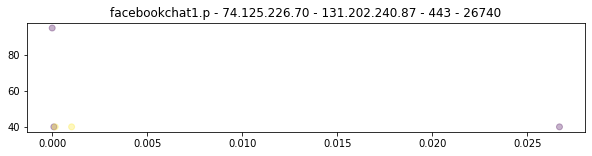

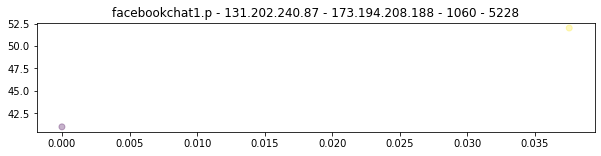

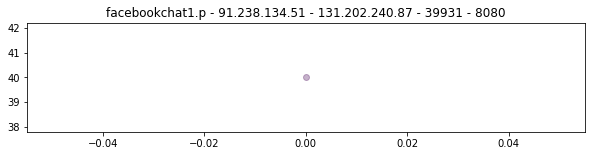

In [9]:
draw_flows("SCX-VPN-NonVPN-2016/NonVPN-PCAPs-01/extracted/facebookchat1")

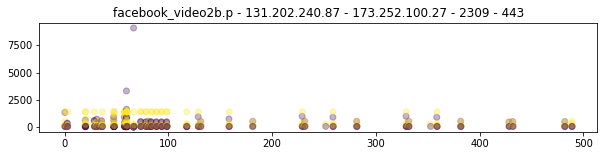

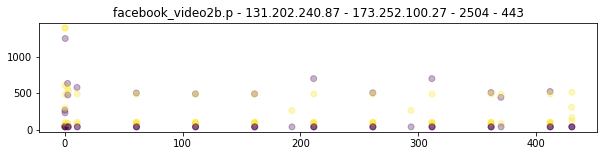

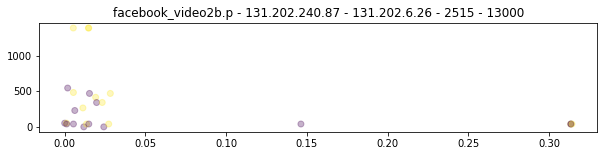

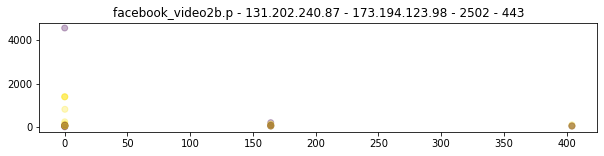

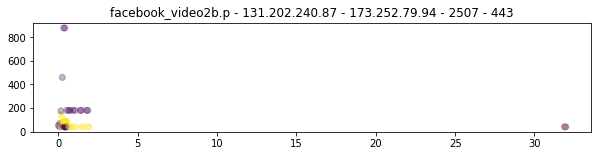

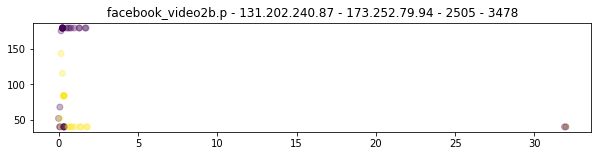

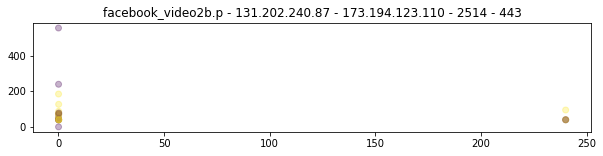

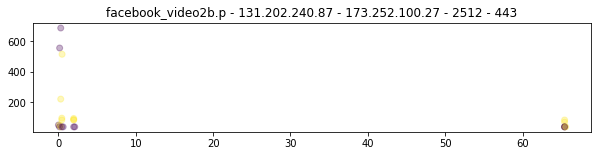

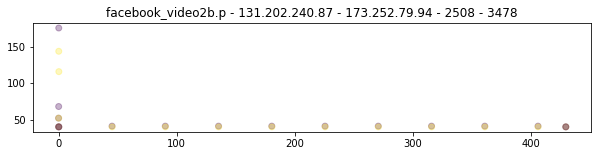

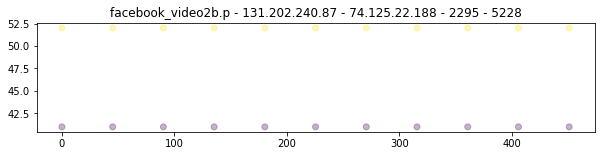

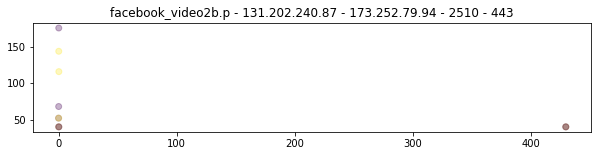

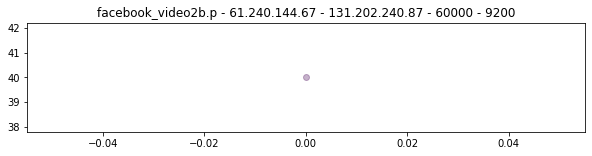

In [10]:
draw_flows("SCX-VPN-NonVPN-2016/NonVPN-PCAPs-01/extracted/facebook_video2b")